**OUTLIER DETECTION AND HANDLING - NUMERICAL DATA**

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load .pkl file and generate pandas dataframe
input_pkl = r'..\data\clean\after_step_2_enhancing.pkl' # Fill your path to file
df_1 = pd.read_pickle(input_pkl)

df_1_shape = df_1.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part
df_1.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Assigned_City_5,Has_Assigned_City_5,Assigned_City_10,Has_Assigned_City_10,Assigned_City_15,Has_Assigned_City_15
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,23,370,Installed,4,To renovate,False,F,767,2552.000000,415.906128,East Flanders,NaN,False,NaN,False,NaN,False,NaN,False
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,23,895,Installed,2,Good,False,D,1050,1796.401198,285.713333,East Flanders,NaN,False,NaN,False,NaN,False,Aalst,True
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,Semi equipped,2,To renovate,False,E,120,1785.714286,2291.666667,Antwerp,NaN,False,NaN,False,NaN,False,Brussels,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,23,300,Installed,3,To renovate,False,F,309,1715.116279,954.692557,Brabant_Wallon,NaN,False,NaN,False,NaN,False,Aalst,True
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,False,False,True,40,32,Installed,3,Good,False,C,412,1600.000000,1359.223301,Brabant_Wallon,NaN,False,NaN,False,NaN,False,Aalst,True


**Functions to use**

In [42]:
# This function get the stats (skew, mean, median, mode, count) and shows a boxplot to visualize the data and spot outliers

def num_data_stats(df, num_data_col):
    # to see outliers from Number_of_bedrooms in boxplot
    sns.boxplot(x=df[num_data_col], orient='h', color='#A3C9E2')
    plt.title(f'{num_data_col} - box plot for outlier detection')
    plt.xlabel(num_data_col)
    plt.show()

    # stats
    print(df[num_data_col].agg(['count','skew','mean','median']))
    print(df[num_data_col].mode())

    return

# This function does detection and removal of outliers via the Z method
def outliers_Z(df, num_data_col):
    upper_limit = df[num_data_col].mean() + 4*df[num_data_col].std()

    lower_limit = df[num_data_col].mean() - 4*df[num_data_col].std()

    print('upper limit:', upper_limit)
    print('lower limit:', lower_limit)

    # find the outlier

    df.loc[(df[num_data_col] > upper_limit) | (df[num_data_col] < lower_limit)]

    # remove outliers

    df_post_Z = df.loc[(df[num_data_col] < upper_limit) & (df[num_data_col] > lower_limit)]
    print('before removing outliers:', len(df))
    print('after removing outliers:', len(df_post_Z))
    print('outliers:', len(df) - len(df_post_Z))

    return df_post_Z

# This function does detection and removal of outliers via the IQR method
def outliers_IQR(df, num_data_col):

    # In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
    # Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

    q1 = df[num_data_col].quantile(0.25)
    q3 = df[num_data_col].quantile(0.75)
    iqr = q3 - q1

    # Specifying the scope of outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Data filtering
    df_post_IQR = df[(df[num_data_col] >= lower_bound) & (df[num_data_col] <= upper_bound)]

    return df_post_IQR

*Price*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

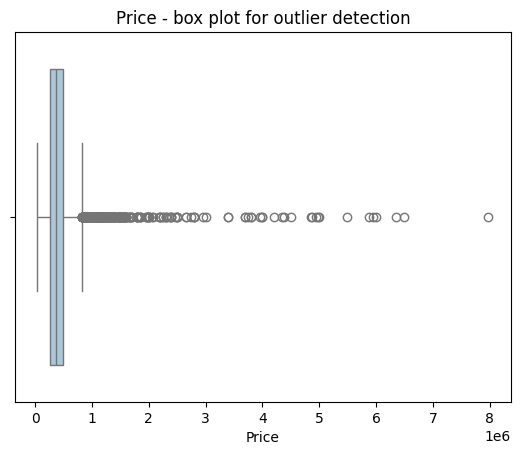

count       5924.000000
skew           7.440012
mean      444675.080689
median    369000.000000
Name: Price, dtype: float64
0    399000
Name: Price, dtype: Int64


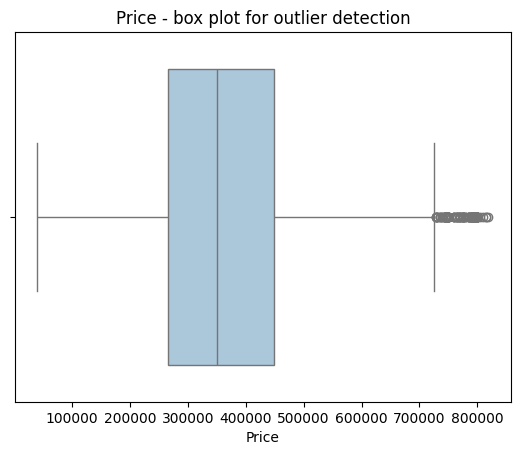

count       5541.000000
skew           0.678681
mean      372557.332431
median    350000.000000
Name: Price, dtype: float64
0    399000
Name: Price, dtype: Int64


In [43]:
num_data_col = 'Price' # Pass the correct data column to the function
df_pre = df_1 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_2 = df_post.copy()

# Pass the output 
df_2_shape = df_2.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part

*Living area*
1. Dealing with missing values
2. Stats and box plots prior to outlier detection and removal
3. Outlier detection and removal via IQR method --> removal of records
4. Stats and box plots after to outlier detection and removal

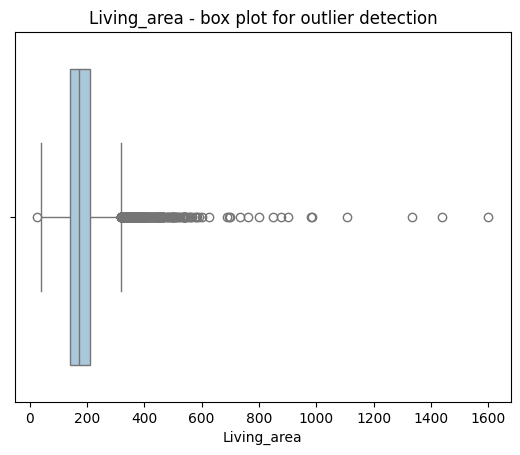

count     5541.000000
skew         4.162064
mean       185.963725
median     171.000000
Name: Living_area, dtype: float64
0    189
Name: Living_area, dtype: Int64


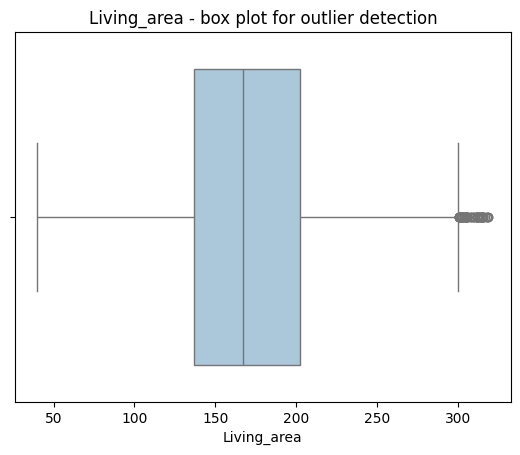

count     5239.000000
skew         0.425528
mean       172.455240
median     167.000000
Name: Living_area, dtype: float64
0    189
Name: Living_area, dtype: Int64


In [44]:
num_data_col = 'Living_area' # Pass the correct data column to the function
df_pre = df_2 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_3 = df_post.copy()

# Pass the output 
df_3_shape = df_3.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part

*Land surface*
1. Dealing with missing values (see step 1)
2. Stats and box plots prior to outlier detection and removal
3. Outlier detection and removal via IQR method --> removal of records
4. Stats and box plots after to outlier detection and removal

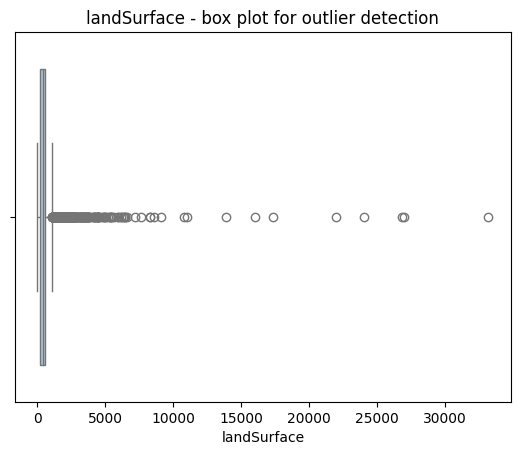

count     5239.000000
skew        15.068461
mean       567.423745
median     412.000000
Name: landSurface, dtype: float64
0    412
Name: landSurface, dtype: Int64


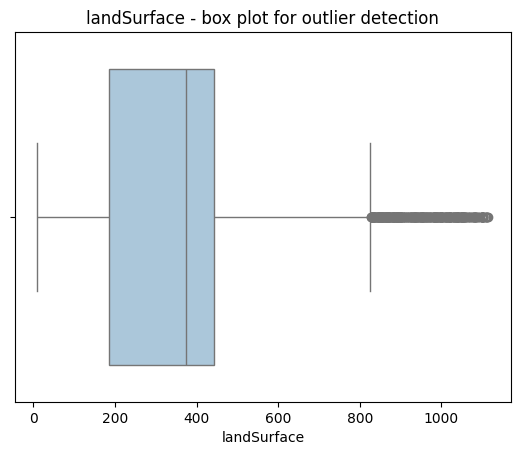

count     4762.000000
skew         0.968214
mean       375.479630
median     373.500000
Name: landSurface, dtype: float64
0    412
Name: landSurface, dtype: Int64


In [45]:
num_data_col = 'landSurface' # Pass the correct data column to the function
df_pre = df_3 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Call function to detect and remove outliers via the Z method.
#df_post = outliers_Z(df_pre, num_data_col) #--> worse than IQR

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_4 = df_post.copy()

# Pass the output 
df_4_shape = df_4.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part

*Number of bedrooms*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

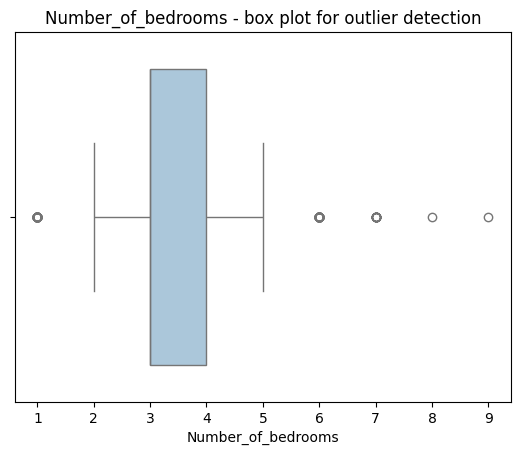

count     4762.000000
skew         0.651103
mean         3.262075
median       3.000000
Name: Number_of_bedrooms, dtype: float64
0    3
Name: Number_of_bedrooms, dtype: Int64


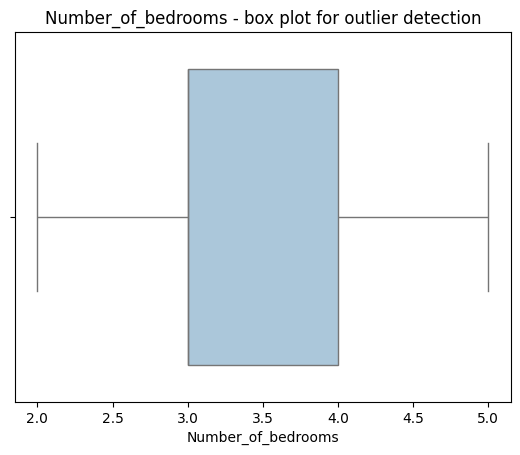

count     4610.000000
skew         0.354259
mean         3.239696
median       3.000000
Name: Number_of_bedrooms, dtype: float64
0    3
Name: Number_of_bedrooms, dtype: Int64


In [46]:
num_data_col = 'Number_of_bedrooms' # Pass the correct data column to the function
df_pre = df_4 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Call function to detect and remove outliers via the Z method.
#df_post = outliers_Z(df_pre, num_data_col) #--> worse than IQR

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_5 = df_post.copy()

# Pass the output 
df_5_shape = df_5.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


*Price per sqm*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

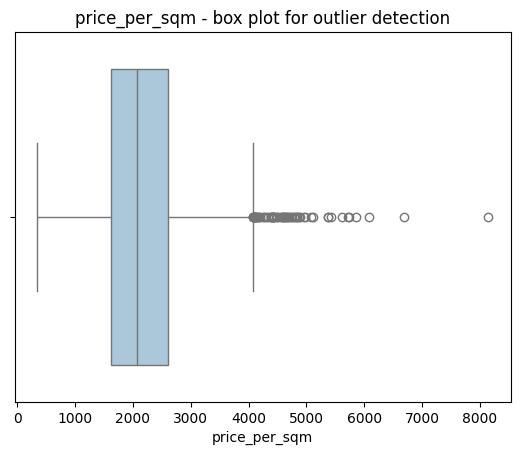

count     4610.000000
skew         0.782083
mean      2148.947352
median    2078.125000
Name: price_per_sqm, dtype: float64
0    2500.0
Name: price_per_sqm, dtype: float64


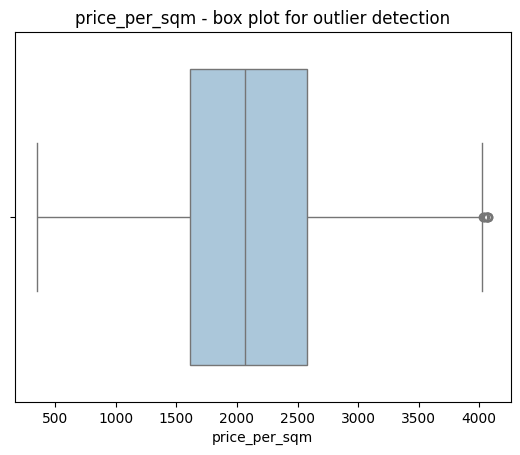

count     4551.000000
skew         0.301661
mean      2115.293614
median    2063.492063
Name: price_per_sqm, dtype: float64
0    2500.0
Name: price_per_sqm, dtype: float64


In [47]:
num_data_col = 'price_per_sqm' # Pass the correct data column to the function
df_pre = df_5 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Call function to detect and remove outliers via the Z method.
#df_post = outliers_Z(df_pre, num_data_col) #--> worse than IQR

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_6 = df_post.copy()

# Pass the output 
df_6_shape = df_6.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part

*Price per sqm land*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

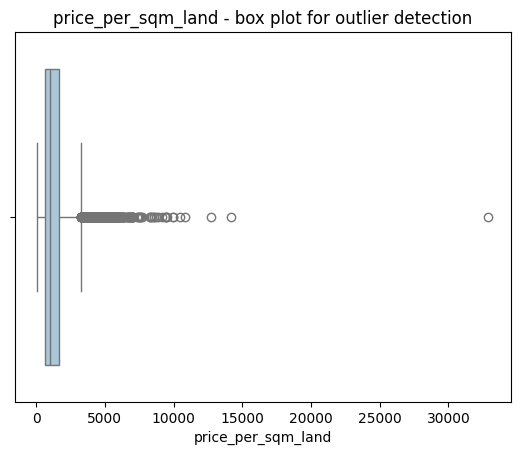

count     4551.000000
skew         4.948728
mean      1429.459878
median    1000.000000
Name: price_per_sqm_land, dtype: float64
0     725.728155
1    1089.805825
Name: price_per_sqm_land, dtype: float64


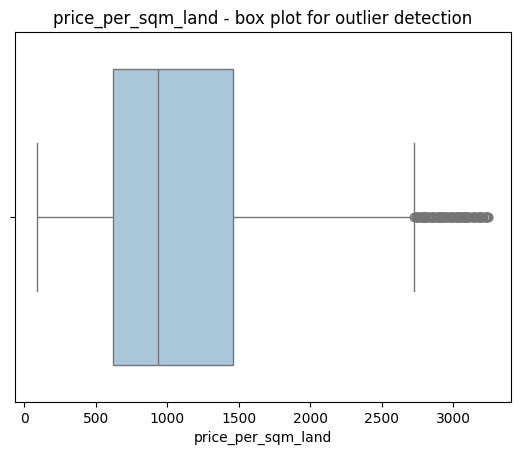

count     4180.000000
skew         1.111893
mean      1119.157170
median     933.788679
Name: price_per_sqm_land, dtype: float64
0     725.728155
1    1089.805825
Name: price_per_sqm_land, dtype: float64


In [48]:
num_data_col = 'price_per_sqm_land' # Pass the correct data column to the function
df_pre = df_6 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Call function to detect and remove outliers via the Z method.
#df_post = outliers_Z(df_pre, num_data_col) #--> worse than IQR

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_7 = df_post.copy()

# Pass the output 
df_7_shape = df_7.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part

**Saving data to a new .csv file and a .pkl file**

In [49]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3a_outliers_num.csv'  # Fill your path to file
df_7.to_csv(output_csv, index=False)

# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3a_outliers_num.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_7, f)

**Summary of outlier detection and handling operation:**

In [50]:
print("**Summary of outlier detection and handling operation:**")
print("Info on dataframe at start of the first cleaning step:")
df_1.info()

print("Dataframe shape at start: ", df_1_shape) 
print("Dataframe shape after outlier handling on price: ", df_2_shape)
print("Dataframe shape after outlier handling on living area: ", df_3_shape)
print("Dataframe shape after outlier handling on land surface: ", df_4_shape)
print("Dataframe shape after outlier handling on nr of bedrooms: ", df_5_shape)
print("Dataframe shape after outlier handling on price per sqm: ", df_6_shape)
print("Dataframe shape after outlier handling on price per sqm land: ", df_7_shape)

print(f"The CSV file was saved as {output_csv}, as well as pickled to {output_pkl}.")
print("Info on dataframe at the end of the first cleaning step:")
df_7.info()

**Summary of outlier detection and handling operation:**
Info on dataframe at start of the first cleaning step:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5924 entries, 0 to 5923
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    5924 non-null   Int64   
 1   locality_name         5924 non-null   category
 2   Postal_code           5924 non-null   object  
 3   Price                 5924 non-null   Int64   
 4   Subtype               5924 non-null   object  
 5   Number_of_bedrooms    5924 non-null   Int64   
 6   Living_area           5924 non-null   Int64   
 7   street                5924 non-null   category
 8   number                5906 non-null   category
 9   latitude              5921 non-null   float64 
 10  longitude             5921 non-null   float64 
 11  Open_fire             5924 non-null   bool    
 12  Swimming_Pool         5924 non-null   bool    
 